In [20]:
import numpy as np
import networkx as nx


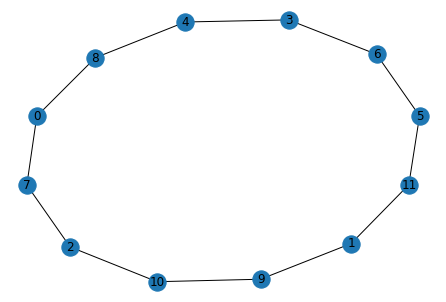

In [23]:
graph = nx.random_regular_graph(d=2,n=12,seed=1111)
pos= nx.spring_layout(graph, seed=111)
# Application Class for maxcut problem
# MAke a maxcut problem from a graph

from qiskit_optimization.applications import Maxcut
maxcut = Maxcut(graph)
maxcut.draw(pos=pos)

In [25]:
# MAke a Quadraticprogram by calling to_quadratic_program()
qp = maxcut.to_quadratic_program()
print(qp)


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 2 x_0 + 2 x_1 + 2 x_2 + 2 x_3 + 2 x_4 + 2 x_5 + 2 x_6 + 2 x_7 + 2 x_8
      + 2 x_9 + 2 x_10 + 2 x_11 + [ - 4 x_0*x_7 - 4 x_0*x_8 - 4 x_1*x_9
      - 4 x_1*x_11 - 4 x_2*x_7 - 4 x_2*x_10 - 4 x_3*x_4 - 4 x_3*x_6 - 4 x_4*x_8
      - 4 x_5*x_6 - 4 x_5*x_11 - 4 x_9*x_10 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1
 0 <= x_6 <= 1
 0 <= x_7 <= 1
 0 <= x_8 <= 1
 0 <= x_9 <= 1
 0 <= x_10 <= 1
 0 <= x_11 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8 x_9 x_10 x_11
End



result:
 optimal function value: 10.0
optimal value: [0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
status: SUCCESS
nsolution:
 [[0, 4, 6, 9, 10, 11], [1, 2, 3, 5, 7, 8]]
ntime: 1.2901406288146973


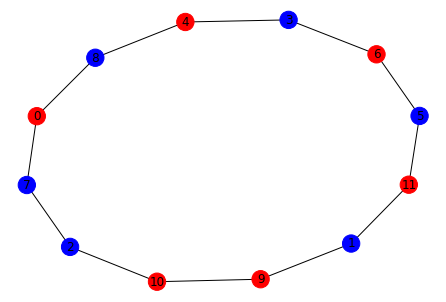

In [26]:
# below sections used to Solve it with QAOA

from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver

qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000,seed_simulator=123)

# defineQAOA solver

meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1,quantum_instance=qins))
result = meo.solve(qp)

print('result:\n', result)
print('nsolution:\n',maxcut.interpret(result))
print('ntime:',result.min_eigen_solver_result.optimizer_time)
maxcut.draw(result, pos=pos)